In [1]:
import pandas as pd 
import numpy as np

In [2]:
data1=pd.read_csv('train_values.csv')
data2=pd.read_csv('train_labels.csv')
data2=data2.drop(['patient_id'],axis=1)
data2.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [3]:
data1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

In [5]:
final=pd.concat([data1,data2],axis=1)
final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
import missingno
missingno.matrix(final,figsize=(20,10))

0    100
1     80
Name: heart_disease_present, dtype: int64


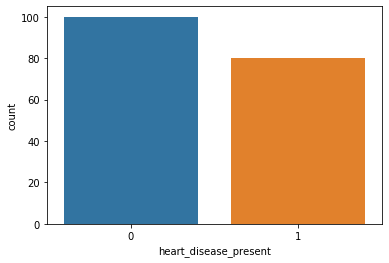

In [7]:
import seaborn as sns
sns.countplot(x='heart_disease_present',data=final)
print(final.heart_disease_present.value_counts())

In [8]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [9]:
df_bin['slope_of_peak_exercise_st_segment'] = final['slope_of_peak_exercise_st_segment']
df_con['slope_of_peak_exercise_st_segment'] = final['slope_of_peak_exercise_st_segment']

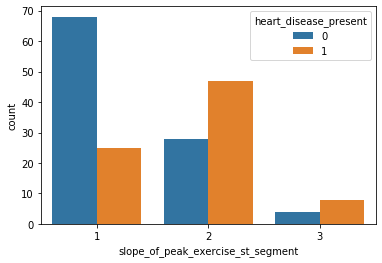

In [10]:
sns.countplot(x='slope_of_peak_exercise_st_segment',hue='heart_disease_present',data=final)

# FEATURE THAL

In [11]:
final.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

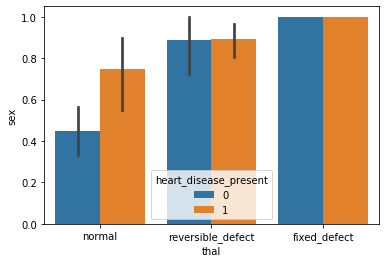

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

#sns.countplot(x='thal',hue='heart_disease_present',data=final)
sns.barplot(x='thal',y='sex',hue='heart_disease_present',data=final)
#plt.figure(figsize=(100, 100))

In [13]:
df_bin['thal'] = final['thal']
df_con['thal'] = final['thal']

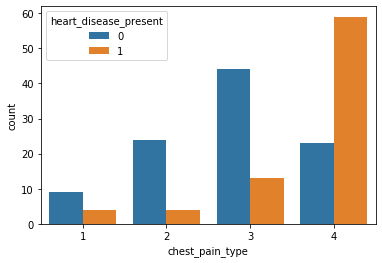

In [14]:
sns.countplot(x='chest_pain_type',hue='heart_disease_present',data=final)

In [15]:
df_bin['chest_pain_type'] = final['chest_pain_type']
df_con['chest_pain_type'] = final['chest_pain_type']

In [16]:
final.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

In [17]:
df_bin['exercise_induced_angina'] = final['exercise_induced_angina']
df_con['exercise_induced_angina'] = final['exercise_induced_angina']

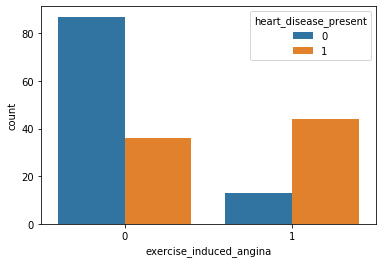

In [18]:
sns.countplot(x='exercise_induced_angina',hue='heart_disease_present',data=final)


In [19]:
df_bin['num_major_vessels']=final['num_major_vessels']
df_con['num_major_vessels']=final['num_major_vessels']

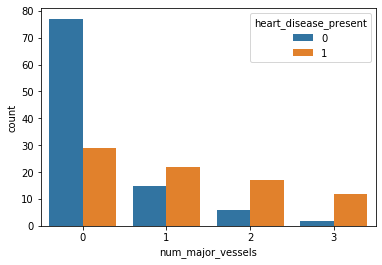

In [20]:
sns.countplot(x='num_major_vessels',hue='heart_disease_present',data=final)

In [21]:
  df_bin['fasting_blood_sugar_gt_120_mg_per_dl']=final['fasting_blood_sugar_gt_120_mg_per_dl']
df_con['fasting_blood_sugar_gt_120_mg_per_dl']=final['fasting_blood_sugar_gt_120_mg_per_dl']

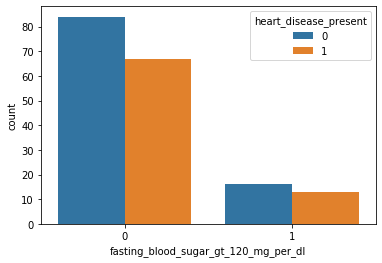

In [22]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',hue='heart_disease_present',data=final)

In [23]:
df_bin['resting_ekg_results']=final['resting_ekg_results']
df_con['resting_ekg_results']=final['resting_ekg_results']

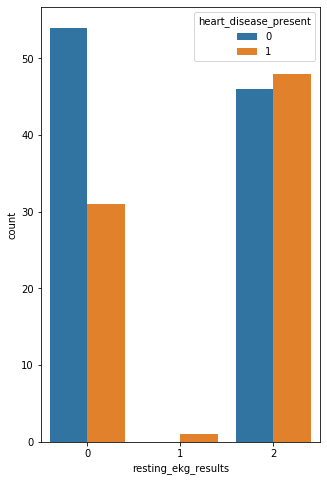

In [24]:
sns.countplot(x='resting_ekg_results',hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(5,8)

In [25]:
df_bin['heart_disease_present']=final['heart_disease_present']
df_con['heart_disease_present']=final['heart_disease_present']

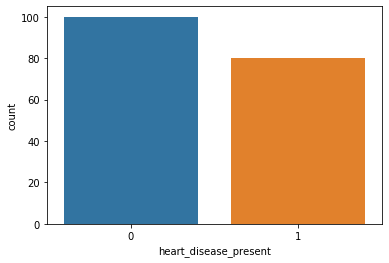

In [26]:
sns.countplot(x='heart_disease_present',data=final)

In [27]:
df_bin['sex']=final['sex']
df_con['sex']=final['sex']

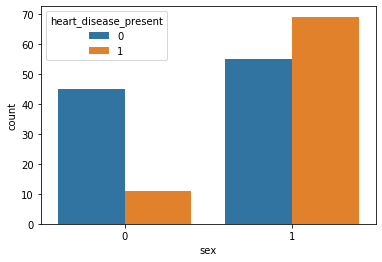

In [28]:
sns.countplot(x='sex',hue='heart_disease_present',data=final)

In [29]:
df_con['age'] = final['age'] 
df_bin['age'] = pd.cut(final['age'], bins=5)

In [30]:
len(final['resting_blood_pressure'].unique())

36

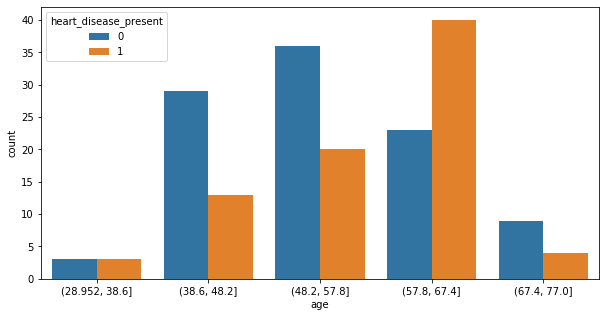

In [31]:
g=sns.countplot(x=df_bin['age'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [32]:
final['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [33]:
df_con['resting_blood_pressure'] = final['resting_blood_pressure'] 
df_bin['resting_blood_pressure'] = pd.cut(final['resting_blood_pressure'], bins=6
                                         )

In [34]:
df_bin.resting_blood_pressure.value_counts()

(122.667, 137.0]      59
(108.333, 122.667]    48
(137.0, 151.333]      42
(151.333, 165.667]    13
(93.914, 108.333]     11
(165.667, 180.0]       7
Name: resting_blood_pressure, dtype: int64

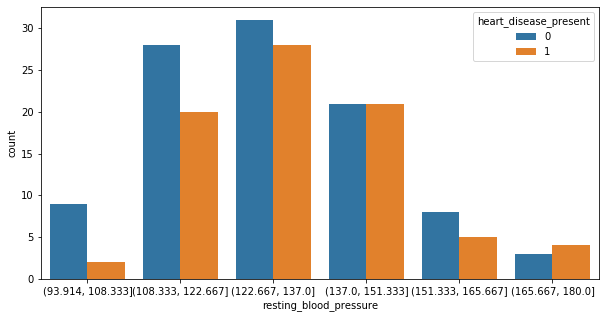

In [35]:
g=sns.countplot(x=df_bin['resting_blood_pressure'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [36]:
final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [37]:
final.serum_cholesterol_mg_per_dl.value_counts()

204    4
239    4
219    3
254    3
309    3
      ..
164    1
167    1
168    1
220    1
172    1
Name: serum_cholesterol_mg_per_dl, Length: 118, dtype: int64

In [38]:
df_con['serum_cholesterol_mg_per_dl'] = final['serum_cholesterol_mg_per_dl'] 
df_bin['serum_cholesterol_mg_per_dl'] = pd.cut(final['serum_cholesterol_mg_per_dl'], bins=5)

In [39]:
df_bin.serum_cholesterol_mg_per_dl.value_counts()

(213.6, 301.2]      106
(125.562, 213.6]     45
(301.2, 388.8]       27
(476.4, 564.0]        1
(388.8, 476.4]        1
Name: serum_cholesterol_mg_per_dl, dtype: int64

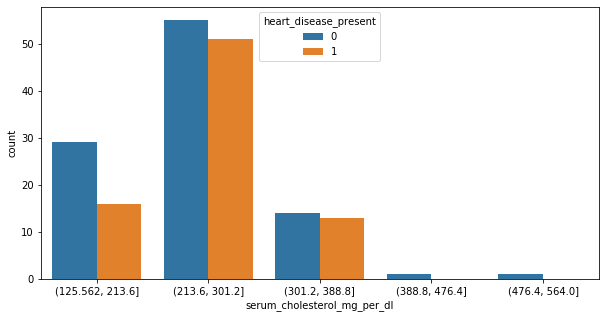

In [40]:
g=sns.countplot(x=df_bin['serum_cholesterol_mg_per_dl'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [41]:
final.max_heart_rate_achieved.value_counts()

162    10
132     6
142     6
150     5
170     5
       ..
180     1
184     1
186     1
188     1
96      1
Name: max_heart_rate_achieved, Length: 73, dtype: int64

In [42]:
df_con['max_heart_rate_achieved'] = final['max_heart_rate_achieved'] 
df_bin['max_heart_rate_achieved'] = pd.cut(final['max_heart_rate_achieved'], bins=5)

In [43]:
df_bin.max_heart_rate_achieved.value_counts()

(159.6, 180.8]     60
(138.4, 159.6]     60
(117.2, 138.4]     32
(95.894, 117.2]    19
(180.8, 202.0]      9
Name: max_heart_rate_achieved, dtype: int64

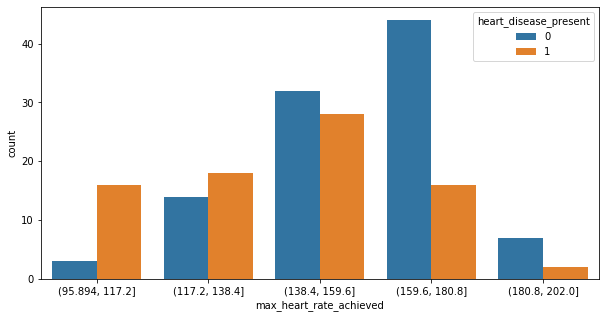

In [44]:
g=sns.countplot(x=df_bin['max_heart_rate_achieved'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [45]:
len(final.oldpeak_eq_st_depression.value_counts())


34

In [46]:
df_con['oldpeak_eq_st_depression'] = final['oldpeak_eq_st_depression'] 
df_bin['oldpeak_eq_st_depression'] = pd.cut(final['oldpeak_eq_st_depression'], bins=9)

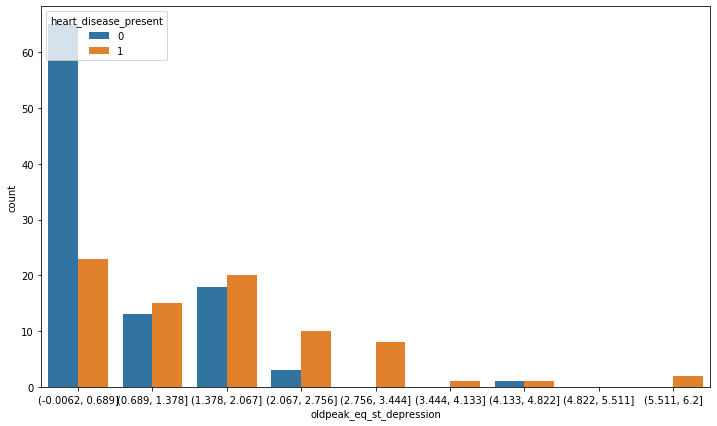

In [47]:
g=sns.countplot(x=df_bin['oldpeak_eq_st_depression'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(12, 7)

In [48]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'exercise_induced_angina',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'heart_disease_present',
 'sex',
 'age',
 'resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'max_heart_rate_achieved',
 'oldpeak_eq_st_depression']

In [49]:
df_bin.head()

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,exercise_induced_angina,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex,age,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,oldpeak_eq_st_depression
0,1,normal,2,0,0,0,2,0,1,"(38.6, 48.2]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
1,2,normal,3,0,0,0,0,0,0,"(48.2, 57.8]","(108.333, 122.667]","(213.6, 301.2]","(138.4, 159.6]","(1.378, 2.067]"
2,1,normal,4,1,3,0,2,1,1,"(67.4, 77.0]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
3,1,reversible_defect,4,0,0,0,0,1,1,"(38.6, 48.2]","(151.333, 165.667]","(213.6, 301.2]","(180.8, 202.0]","(-0.0062, 0.689]"
4,3,reversible_defect,1,0,0,0,2,0,1,"(57.8, 67.4]","(165.667, 180.0]","(213.6, 301.2]","(138.4, 159.6]","(4.133, 4.822]"


In [50]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()


,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,"max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]"
0,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
test=df_bin_enc
len(test.columns.tolist())

55

In [52]:
selected=test.drop(['heart_disease_present_0', 'heart_disease_present_1'], axis = 1) 

In [53]:
x_train=selected
x_train.columns.tolist()

['slope_of_peak_exercise_st_segment_1',
 'slope_of_peak_exercise_st_segment_2',
 'slope_of_peak_exercise_st_segment_3',
 'thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'num_major_vessels_0',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'fasting_blood_sugar_gt_120_mg_per_dl_0',
 'fasting_blood_sugar_gt_120_mg_per_dl_1',
 'resting_ekg_results_0',
 'resting_ekg_results_1',
 'resting_ekg_results_2',
 'sex_0',
 'sex_1',
 'age_(28.952, 38.6]',
 'age_(38.6, 48.2]',
 'age_(48.2, 57.8]',
 'age_(57.8, 67.4]',
 'age_(67.4, 77.0]',
 'resting_blood_pressure_(93.914, 108.333]',
 'resting_blood_pressure_(108.333, 122.667]',
 'resting_blood_pressure_(122.667, 137.0]',
 'resting_blood_pressure_(137.0, 151.333]',
 'resting_blood_pressure_(151.333, 165.667]',
 'resting_blood_pressure_(165.667, 180.0]',
 'serum_cho

In [54]:
y_train=df_bin.heart_disease_present
y_train

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [55]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [56]:
# Start Python Imports
import math, time, random, datetime
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 88.89
Accuracy CV 10-Fold: 82.22
Running Time: 0:00:20.126721


In [57]:
from sklearn.neighbors import KNeighborsClassifier
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 86.11
Accuracy CV 10-Fold: 83.33
Running Time: 0:00:03.017872


In [58]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 72.22
Accuracy CV 10-Fold: 71.11
Running Time: 0:00:00.329530


In [59]:
from sklearn.svm import LinearSVC
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 91.11
Accuracy CV 10-Fold: 80.0
Running Time: 0:00:00.136634


In [60]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 81.67
Accuracy CV 10-Fold: 77.78
Running Time: 0:00:00.118846


In [61]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 73.89
Running Time: 0:00:00.205480


In [62]:
# Gradient Boosting Trees
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 99.44
Accuracy CV 10-Fold: 77.78
Running Time: 0:00:08.632027


In [63]:
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [64]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(x_train, 
                  y_train,
                  cat_features)

In [76]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)
print(acc_catboost)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010313
0:	learn: 0.6864573	total: 1.85ms	remaining: 1.85s
1:	learn: 0.6788360	total: 4.21ms	remaining: 2.1s
2:	learn: 0.6736421	total: 5.33ms	remaining: 1.77s
3:	learn: 0.6659480	total: 7.13ms	remaining: 1.77s
4:	learn: 0.6591932	total: 9.26ms	remaining: 1.84s
5:	learn: 0.6512820	total: 11.4ms	remaining: 1.88s
6:	learn: 0.6441180	total: 13.6ms	remaining: 1.93s
7:	learn: 0.6371340	total: 15.7ms	remaining: 1.95s
8:	learn: 0.6316953	total: 17.7ms	remaining: 1.95s
9:	learn: 0.6246803	total: 19.6ms	remaining: 1.94s
10:	learn: 0.6206989	total: 21.6ms	remaining: 1.94s
11:	learn: 0.6166097	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6111246	total: 24.7ms	remaining: 1.88s
13:	learn: 0.6047553	total: 26.5ms	remaining: 1.86s
14:	learn: 0.5995212	total: 28.4ms	remaining: 1.86s
15:	learn: 0.5942055	total: 30.2ms	remaining: 1.85s
16:	learn: 0.5902038	total: 32.1ms	remaining: 1.85s
17:	learn: 0.5829314	total: 34.2ms	remaining: 1.86s
18:	learn: 0.5769213	total: 36.2ms	remaining:

175:	learn: 0.2472819	total: 452ms	remaining: 2.12s
176:	learn: 0.2462054	total: 455ms	remaining: 2.12s
177:	learn: 0.2450619	total: 458ms	remaining: 2.11s
178:	learn: 0.2442162	total: 462ms	remaining: 2.12s
179:	learn: 0.2439132	total: 467ms	remaining: 2.13s
180:	learn: 0.2428638	total: 469ms	remaining: 2.12s
181:	learn: 0.2420376	total: 473ms	remaining: 2.13s
182:	learn: 0.2414814	total: 476ms	remaining: 2.13s
183:	learn: 0.2403861	total: 478ms	remaining: 2.12s
184:	learn: 0.2390540	total: 483ms	remaining: 2.13s
185:	learn: 0.2383864	total: 486ms	remaining: 2.13s
186:	learn: 0.2379414	total: 488ms	remaining: 2.12s
187:	learn: 0.2373616	total: 490ms	remaining: 2.12s
188:	learn: 0.2364995	total: 492ms	remaining: 2.11s
189:	learn: 0.2357830	total: 494ms	remaining: 2.11s
190:	learn: 0.2351203	total: 498ms	remaining: 2.11s
191:	learn: 0.2343771	total: 500ms	remaining: 2.1s
192:	learn: 0.2334556	total: 503ms	remaining: 2.1s
193:	learn: 0.2329148	total: 505ms	remaining: 2.1s
194:	learn: 0.2

360:	learn: 0.1456793	total: 926ms	remaining: 1.64s
361:	learn: 0.1456489	total: 927ms	remaining: 1.63s
362:	learn: 0.1451363	total: 929ms	remaining: 1.63s
363:	learn: 0.1448066	total: 932ms	remaining: 1.63s
364:	learn: 0.1442806	total: 934ms	remaining: 1.63s
365:	learn: 0.1441135	total: 938ms	remaining: 1.63s
366:	learn: 0.1436431	total: 940ms	remaining: 1.62s
367:	learn: 0.1432902	total: 943ms	remaining: 1.62s
368:	learn: 0.1430592	total: 945ms	remaining: 1.62s
369:	learn: 0.1427880	total: 948ms	remaining: 1.61s
370:	learn: 0.1424000	total: 950ms	remaining: 1.61s
371:	learn: 0.1420444	total: 952ms	remaining: 1.61s
372:	learn: 0.1417142	total: 955ms	remaining: 1.6s
373:	learn: 0.1413689	total: 957ms	remaining: 1.6s
374:	learn: 0.1409680	total: 959ms	remaining: 1.6s
375:	learn: 0.1407446	total: 961ms	remaining: 1.59s
376:	learn: 0.1405162	total: 963ms	remaining: 1.59s
377:	learn: 0.1400767	total: 965ms	remaining: 1.59s
378:	learn: 0.1397401	total: 968ms	remaining: 1.58s
379:	learn: 0.1

524:	learn: 0.0987705	total: 1.4s	remaining: 1.27s
525:	learn: 0.0985414	total: 1.4s	remaining: 1.26s
526:	learn: 0.0983783	total: 1.41s	remaining: 1.26s
527:	learn: 0.0981651	total: 1.41s	remaining: 1.26s
528:	learn: 0.0979793	total: 1.41s	remaining: 1.26s
529:	learn: 0.0978015	total: 1.41s	remaining: 1.25s
530:	learn: 0.0975686	total: 1.42s	remaining: 1.25s
531:	learn: 0.0974052	total: 1.42s	remaining: 1.25s
532:	learn: 0.0971684	total: 1.42s	remaining: 1.24s
533:	learn: 0.0969999	total: 1.42s	remaining: 1.24s
534:	learn: 0.0966843	total: 1.42s	remaining: 1.24s
535:	learn: 0.0963408	total: 1.43s	remaining: 1.23s
536:	learn: 0.0961394	total: 1.43s	remaining: 1.23s
537:	learn: 0.0957965	total: 1.43s	remaining: 1.23s
538:	learn: 0.0955662	total: 1.43s	remaining: 1.22s
539:	learn: 0.0953764	total: 1.43s	remaining: 1.22s
540:	learn: 0.0952100	total: 1.44s	remaining: 1.22s
541:	learn: 0.0950597	total: 1.44s	remaining: 1.21s
542:	learn: 0.0948626	total: 1.44s	remaining: 1.21s
543:	learn: 0.

715:	learn: 0.0662299	total: 1.85s	remaining: 736ms
716:	learn: 0.0661080	total: 1.86s	remaining: 733ms
717:	learn: 0.0660264	total: 1.86s	remaining: 730ms
718:	learn: 0.0659166	total: 1.86s	remaining: 727ms
719:	learn: 0.0657948	total: 1.86s	remaining: 724ms
720:	learn: 0.0656260	total: 1.86s	remaining: 722ms
721:	learn: 0.0655466	total: 1.87s	remaining: 719ms
722:	learn: 0.0653442	total: 1.87s	remaining: 716ms
723:	learn: 0.0652377	total: 1.87s	remaining: 713ms
724:	learn: 0.0651414	total: 1.87s	remaining: 711ms
725:	learn: 0.0650231	total: 1.88s	remaining: 708ms
726:	learn: 0.0649038	total: 1.88s	remaining: 705ms
727:	learn: 0.0648449	total: 1.88s	remaining: 702ms
728:	learn: 0.0647421	total: 1.88s	remaining: 700ms
729:	learn: 0.0645987	total: 1.88s	remaining: 697ms
730:	learn: 0.0645038	total: 1.89s	remaining: 694ms
731:	learn: 0.0643705	total: 1.89s	remaining: 691ms
732:	learn: 0.0642148	total: 1.89s	remaining: 689ms
733:	learn: 0.0640638	total: 1.89s	remaining: 686ms
734:	learn: 

926:	learn: 0.0454486	total: 2.37s	remaining: 186ms
927:	learn: 0.0454036	total: 2.37s	remaining: 184ms
928:	learn: 0.0453412	total: 2.37s	remaining: 181ms
929:	learn: 0.0452860	total: 2.37s	remaining: 179ms
930:	learn: 0.0452160	total: 2.38s	remaining: 176ms
931:	learn: 0.0451252	total: 2.38s	remaining: 174ms
932:	learn: 0.0450490	total: 2.38s	remaining: 171ms
933:	learn: 0.0449960	total: 2.38s	remaining: 169ms
934:	learn: 0.0449294	total: 2.39s	remaining: 166ms
935:	learn: 0.0448844	total: 2.39s	remaining: 163ms
936:	learn: 0.0448360	total: 2.39s	remaining: 161ms
937:	learn: 0.0447532	total: 2.4s	remaining: 158ms
938:	learn: 0.0446673	total: 2.4s	remaining: 156ms
939:	learn: 0.0445659	total: 2.4s	remaining: 153ms
940:	learn: 0.0444864	total: 2.4s	remaining: 151ms
941:	learn: 0.0444002	total: 2.4s	remaining: 148ms
942:	learn: 0.0443114	total: 2.41s	remaining: 146ms
943:	learn: 0.0442231	total: 2.41s	remaining: 143ms
944:	learn: 0.0441844	total: 2.41s	remaining: 141ms
945:	learn: 0.044

In [80]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6712708	test: 0.6772447	best: 0.6772447 (0)	total: 3.64s	remaining: 1h 33s
1:	learn: 0.6532732	test: 0.6611700	best: 0.6611700 (1)	total: 12s	remaining: 1h 39m 55s
2:	learn: 0.6334387	test: 0.6470836	best: 0.6470836 (2)	total: 17.1s	remaining: 1h 34m 55s
3:	learn: 0.6142739	test: 0.6324032	best: 0.6324032 (3)	total: 21.4s	remaining: 1h 28m 46s
4:	learn: 0.5936558	test: 0.6172569	best: 0.6172569 (4)	total: 27s	remaining: 1h 29m 34s
5:	learn: 0.5771018	test: 0.6062241	best: 0.6062241 (5)	total: 33s	remaining: 1h 31m 1s
6:	learn: 0.5595693	test: 0.5927989	best: 0.5927989 (6)	total: 39.1s	remaining: 1h 32m 32s
7:	learn: 0.5446043	test: 0.5833916	best: 0.5833916 (7)	total: 45.3s	remaining: 1h 33m 39s
8:	learn: 0.5315116	test: 0.5764683	best: 0.5764683 (8)	total: 52.7s	remaining: 1h 36m 42s
9:	learn: 0.5179967	test: 0.5670937	best: 0.5670937 (9)	total: 1m	remaining: 1h 39m 56s
10:	learn: 0.5092751	test: 0.5599207	best: 0.5599207 (10)	total: 1m 5s	remaining: 1h 38m 22s
11:	learn: 

88:	learn: 0.1826231	test: 0.4232922	best: 0.4232922 (88)	total: 7m 1s	remaining: 1h 11m 49s
89:	learn: 0.1811481	test: 0.4230174	best: 0.4230174 (89)	total: 7m 4s	remaining: 1h 11m 34s
90:	learn: 0.1797397	test: 0.4227057	best: 0.4227057 (90)	total: 7m 8s	remaining: 1h 11m 16s
91:	learn: 0.1783364	test: 0.4232359	best: 0.4227057 (90)	total: 7m 11s	remaining: 1h 10m 58s
92:	learn: 0.1769271	test: 0.4232562	best: 0.4227057 (90)	total: 7m 14s	remaining: 1h 10m 41s
93:	learn: 0.1754565	test: 0.4234269	best: 0.4227057 (90)	total: 7m 18s	remaining: 1h 10m 27s
94:	learn: 0.1739459	test: 0.4238169	best: 0.4227057 (90)	total: 7m 22s	remaining: 1h 10m 10s
95:	learn: 0.1722056	test: 0.4232153	best: 0.4227057 (90)	total: 7m 25s	remaining: 1h 9m 54s
96:	learn: 0.1705820	test: 0.4235339	best: 0.4227057 (90)	total: 7m 29s	remaining: 1h 9m 41s
97:	learn: 0.1692124	test: 0.4233450	best: 0.4227057 (90)	total: 7m 32s	remaining: 1h 9m 27s
98:	learn: 0.1677306	test: 0.4233631	best: 0.4227057 (90)	total: 7

176:	learn: 0.0957813	test: 0.4368964	best: 0.4227057 (90)	total: 12m 50s	remaining: 59m 44s
177:	learn: 0.0951382	test: 0.4369941	best: 0.4227057 (90)	total: 12m 55s	remaining: 59m 39s
178:	learn: 0.0945370	test: 0.4372913	best: 0.4227057 (90)	total: 12m 59s	remaining: 59m 33s
179:	learn: 0.0939055	test: 0.4380213	best: 0.4227057 (90)	total: 13m 2s	remaining: 59m 25s
180:	learn: 0.0931937	test: 0.4385730	best: 0.4227057 (90)	total: 13m 6s	remaining: 59m 18s
181:	learn: 0.0924838	test: 0.4389100	best: 0.4227057 (90)	total: 13m 9s	remaining: 59m 9s
182:	learn: 0.0918855	test: 0.4391340	best: 0.4227057 (90)	total: 13m 14s	remaining: 59m 5s
183:	learn: 0.0913700	test: 0.4392909	best: 0.4227057 (90)	total: 13m 17s	remaining: 58m 58s
184:	learn: 0.0907668	test: 0.4400953	best: 0.4227057 (90)	total: 13m 21s	remaining: 58m 50s
185:	learn: 0.0901215	test: 0.4408957	best: 0.4227057 (90)	total: 13m 24s	remaining: 58m 42s
186:	learn: 0.0895245	test: 0.4409475	best: 0.4227057 (90)	total: 13m 28s	r

265:	learn: 0.0548969	test: 0.4619343	best: 0.4227057 (90)	total: 18m 36s	remaining: 51m 20s
266:	learn: 0.0546441	test: 0.4624854	best: 0.4227057 (90)	total: 18m 39s	remaining: 51m 14s
267:	learn: 0.0543229	test: 0.4628943	best: 0.4227057 (90)	total: 18m 43s	remaining: 51m 9s
268:	learn: 0.0540453	test: 0.4630938	best: 0.4227057 (90)	total: 18m 48s	remaining: 51m 6s
269:	learn: 0.0537897	test: 0.4635337	best: 0.4227057 (90)	total: 18m 51s	remaining: 50m 59s
270:	learn: 0.0535280	test: 0.4636998	best: 0.4227057 (90)	total: 18m 56s	remaining: 50m 56s
271:	learn: 0.0532421	test: 0.4644247	best: 0.4227057 (90)	total: 19m 2s	remaining: 50m 57s
272:	learn: 0.0529570	test: 0.4651037	best: 0.4227057 (90)	total: 19m 6s	remaining: 50m 53s
273:	learn: 0.0526498	test: 0.4656796	best: 0.4227057 (90)	total: 19m 11s	remaining: 50m 49s
274:	learn: 0.0523294	test: 0.4664800	best: 0.4227057 (90)	total: 19m 15s	remaining: 50m 45s
275:	learn: 0.0520836	test: 0.4664950	best: 0.4227057 (90)	total: 19m 19s	

354:	learn: 0.0360513	test: 0.4883602	best: 0.4227057 (90)	total: 25m 19s	remaining: 46m 1s
355:	learn: 0.0359419	test: 0.4885427	best: 0.4227057 (90)	total: 25m 24s	remaining: 45m 57s
356:	learn: 0.0358137	test: 0.4887878	best: 0.4227057 (90)	total: 25m 28s	remaining: 45m 53s
357:	learn: 0.0356719	test: 0.4893675	best: 0.4227057 (90)	total: 25m 32s	remaining: 45m 48s
358:	learn: 0.0355456	test: 0.4892382	best: 0.4227057 (90)	total: 25m 40s	remaining: 45m 51s
359:	learn: 0.0354138	test: 0.4895771	best: 0.4227057 (90)	total: 25m 45s	remaining: 45m 48s
360:	learn: 0.0352561	test: 0.4901168	best: 0.4227057 (90)	total: 25m 50s	remaining: 45m 43s
361:	learn: 0.0351116	test: 0.4901172	best: 0.4227057 (90)	total: 25m 55s	remaining: 45m 41s
362:	learn: 0.0349725	test: 0.4898278	best: 0.4227057 (90)	total: 26m	remaining: 45m 37s
363:	learn: 0.0348700	test: 0.4901275	best: 0.4227057 (90)	total: 26m 8s	remaining: 45m 39s
364:	learn: 0.0347313	test: 0.4898903	best: 0.4227057 (90)	total: 26m 13s	re

443:	learn: 0.0260236	test: 0.5064791	best: 0.4227057 (90)	total: 34m 43s	remaining: 43m 28s
444:	learn: 0.0259395	test: 0.5067441	best: 0.4227057 (90)	total: 34m 47s	remaining: 43m 24s
445:	learn: 0.0258732	test: 0.5067398	best: 0.4227057 (90)	total: 34m 52s	remaining: 43m 18s
446:	learn: 0.0257795	test: 0.5071795	best: 0.4227057 (90)	total: 34m 57s	remaining: 43m 14s
447:	learn: 0.0256991	test: 0.5071664	best: 0.4227057 (90)	total: 35m 1s	remaining: 43m 9s
448:	learn: 0.0256234	test: 0.5070648	best: 0.4227057 (90)	total: 35m 6s	remaining: 43m 4s
449:	learn: 0.0255403	test: 0.5070788	best: 0.4227057 (90)	total: 35m 10s	remaining: 42m 58s
450:	learn: 0.0254710	test: 0.5072140	best: 0.4227057 (90)	total: 35m 13s	remaining: 42m 53s
451:	learn: 0.0253943	test: 0.5073326	best: 0.4227057 (90)	total: 35m 18s	remaining: 42m 48s
452:	learn: 0.0253005	test: 0.5076629	best: 0.4227057 (90)	total: 35m 22s	remaining: 42m 43s
453:	learn: 0.0252273	test: 0.5080028	best: 0.4227057 (90)	total: 35m 26s	

532:	learn: 0.0199590	test: 0.5217222	best: 0.4227057 (90)	total: 41m 9s	remaining: 36m 3s
533:	learn: 0.0199052	test: 0.5220577	best: 0.4227057 (90)	total: 41m 14s	remaining: 35m 59s
534:	learn: 0.0198551	test: 0.5223173	best: 0.4227057 (90)	total: 41m 19s	remaining: 35m 55s
535:	learn: 0.0198089	test: 0.5225441	best: 0.4227057 (90)	total: 41m 24s	remaining: 35m 50s
536:	learn: 0.0197551	test: 0.5226296	best: 0.4227057 (90)	total: 41m 28s	remaining: 35m 45s
537:	learn: 0.0197052	test: 0.5228727	best: 0.4227057 (90)	total: 41m 34s	remaining: 35m 42s
538:	learn: 0.0196479	test: 0.5232002	best: 0.4227057 (90)	total: 41m 38s	remaining: 35m 37s
539:	learn: 0.0195944	test: 0.5234052	best: 0.4227057 (90)	total: 41m 42s	remaining: 35m 31s
540:	learn: 0.0195392	test: 0.5234253	best: 0.4227057 (90)	total: 41m 46s	remaining: 35m 26s
541:	learn: 0.0194898	test: 0.5234474	best: 0.4227057 (90)	total: 41m 51s	remaining: 35m 22s
542:	learn: 0.0194267	test: 0.5236342	best: 0.4227057 (90)	total: 41m 55

621:	learn: 0.0160185	test: 0.5383186	best: 0.4227057 (90)	total: 48m 31s	remaining: 29m 29s
622:	learn: 0.0159842	test: 0.5384123	best: 0.4227057 (90)	total: 48m 35s	remaining: 29m 24s
623:	learn: 0.0159507	test: 0.5385229	best: 0.4227057 (90)	total: 48m 38s	remaining: 29m 18s
624:	learn: 0.0159145	test: 0.5384930	best: 0.4227057 (90)	total: 48m 43s	remaining: 29m 13s
625:	learn: 0.0158740	test: 0.5385320	best: 0.4227057 (90)	total: 48m 46s	remaining: 29m 8s
626:	learn: 0.0158407	test: 0.5387865	best: 0.4227057 (90)	total: 48m 49s	remaining: 29m 3s
627:	learn: 0.0158062	test: 0.5389293	best: 0.4227057 (90)	total: 48m 53s	remaining: 28m 57s
628:	learn: 0.0157723	test: 0.5392333	best: 0.4227057 (90)	total: 48m 58s	remaining: 28m 53s
629:	learn: 0.0157419	test: 0.5396307	best: 0.4227057 (90)	total: 49m 2s	remaining: 28m 47s
630:	learn: 0.0157070	test: 0.5398214	best: 0.4227057 (90)	total: 49m 7s	remaining: 28m 43s
631:	learn: 0.0156722	test: 0.5399547	best: 0.4227057 (90)	total: 49m 11s	

710:	learn: 0.0133552	test: 0.5513841	best: 0.4227057 (90)	total: 55m 10s	remaining: 22m 25s
711:	learn: 0.0133290	test: 0.5515522	best: 0.4227057 (90)	total: 55m 13s	remaining: 22m 20s
712:	learn: 0.0133039	test: 0.5518362	best: 0.4227057 (90)	total: 55m 18s	remaining: 22m 15s
713:	learn: 0.0132786	test: 0.5517853	best: 0.4227057 (90)	total: 55m 22s	remaining: 22m 10s
714:	learn: 0.0132511	test: 0.5520796	best: 0.4227057 (90)	total: 55m 26s	remaining: 22m 6s
715:	learn: 0.0132309	test: 0.5521677	best: 0.4227057 (90)	total: 55m 31s	remaining: 22m 1s
716:	learn: 0.0132110	test: 0.5524408	best: 0.4227057 (90)	total: 55m 36s	remaining: 21m 56s
717:	learn: 0.0131891	test: 0.5525428	best: 0.4227057 (90)	total: 55m 40s	remaining: 21m 52s
718:	learn: 0.0131653	test: 0.5524290	best: 0.4227057 (90)	total: 55m 44s	remaining: 21m 47s
719:	learn: 0.0131408	test: 0.5526008	best: 0.4227057 (90)	total: 55m 49s	remaining: 21m 42s
720:	learn: 0.0131166	test: 0.5527788	best: 0.4227057 (90)	total: 55m 53

799:	learn: 0.0114237	test: 0.5633610	best: 0.4227057 (90)	total: 1h 3m 28s	remaining: 15m 52s
800:	learn: 0.0114019	test: 0.5634483	best: 0.4227057 (90)	total: 1h 3m 33s	remaining: 15m 47s
801:	learn: 0.0113836	test: 0.5634960	best: 0.4227057 (90)	total: 1h 3m 43s	remaining: 15m 43s
802:	learn: 0.0113645	test: 0.5636212	best: 0.4227057 (90)	total: 1h 3m 49s	remaining: 15m 39s
803:	learn: 0.0113453	test: 0.5637373	best: 0.4227057 (90)	total: 1h 3m 54s	remaining: 15m 34s
804:	learn: 0.0113282	test: 0.5638584	best: 0.4227057 (90)	total: 1h 3m 59s	remaining: 15m 30s
805:	learn: 0.0113111	test: 0.5640183	best: 0.4227057 (90)	total: 1h 4m 5s	remaining: 15m 25s
806:	learn: 0.0112982	test: 0.5640917	best: 0.4227057 (90)	total: 1h 4m 10s	remaining: 15m 20s
807:	learn: 0.0112834	test: 0.5642389	best: 0.4227057 (90)	total: 1h 4m 15s	remaining: 15m 16s
808:	learn: 0.0112643	test: 0.5642716	best: 0.4227057 (90)	total: 1h 4m 21s	remaining: 15m 11s
809:	learn: 0.0112489	test: 0.5643957	best: 0.42270

886:	learn: 0.0099347	test: 0.5734036	best: 0.4227057 (90)	total: 1h 12m 39s	remaining: 9m 15s
887:	learn: 0.0099221	test: 0.5734192	best: 0.4227057 (90)	total: 1h 12m 47s	remaining: 9m 10s
888:	learn: 0.0099041	test: 0.5734397	best: 0.4227057 (90)	total: 1h 12m 55s	remaining: 9m 6s
889:	learn: 0.0098894	test: 0.5736069	best: 0.4227057 (90)	total: 1h 13m 3s	remaining: 9m 1s
890:	learn: 0.0098764	test: 0.5736751	best: 0.4227057 (90)	total: 1h 13m 9s	remaining: 8m 56s
891:	learn: 0.0098629	test: 0.5738775	best: 0.4227057 (90)	total: 1h 13m 17s	remaining: 8m 52s
892:	learn: 0.0098479	test: 0.5740931	best: 0.4227057 (90)	total: 1h 13m 25s	remaining: 8m 47s
893:	learn: 0.0098316	test: 0.5741090	best: 0.4227057 (90)	total: 1h 13m 35s	remaining: 8m 43s
894:	learn: 0.0098188	test: 0.5740084	best: 0.4227057 (90)	total: 1h 13m 41s	remaining: 8m 38s
895:	learn: 0.0098049	test: 0.5740830	best: 0.4227057 (90)	total: 1h 13m 49s	remaining: 8m 34s
896:	learn: 0.0097898	test: 0.5740395	best: 0.4227057 

973:	learn: 0.0088051	test: 0.5832941	best: 0.4227057 (90)	total: 1h 22m 29s	remaining: 2m 12s
974:	learn: 0.0087939	test: 0.5833068	best: 0.4227057 (90)	total: 1h 22m 33s	remaining: 2m 7s
975:	learn: 0.0087815	test: 0.5834428	best: 0.4227057 (90)	total: 1h 22m 37s	remaining: 2m 1s
976:	learn: 0.0087693	test: 0.5835978	best: 0.4227057 (90)	total: 1h 22m 41s	remaining: 1m 56s
977:	learn: 0.0087577	test: 0.5836862	best: 0.4227057 (90)	total: 1h 22m 45s	remaining: 1m 51s
978:	learn: 0.0087442	test: 0.5839007	best: 0.4227057 (90)	total: 1h 22m 53s	remaining: 1m 46s
979:	learn: 0.0087317	test: 0.5839259	best: 0.4227057 (90)	total: 1h 23m 3s	remaining: 1m 41s
980:	learn: 0.0087202	test: 0.5840066	best: 0.4227057 (90)	total: 1h 23m 11s	remaining: 1m 36s
981:	learn: 0.0087079	test: 0.5840783	best: 0.4227057 (90)	total: 1h 23m 21s	remaining: 1m 31s
982:	learn: 0.0086941	test: 0.5841662	best: 0.4227057 (90)	total: 1h 23m 26s	remaining: 1m 26s
983:	learn: 0.0086805	test: 0.5843157	best: 0.4227057

In [79]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
7,CatBoost,100.00
6,Gradient Boosting Trees,99.44
4,Linear SVC,91.11
1,Logistic Regression,88.89
0,KNN,86.11
3,Stochastic Gradient Decent,81.67
2,Naive Bayes,72.22


In [81]:
##comparing cross validation
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,85.00
0,KNN,83.33
1,Logistic Regression,82.22
4,Linear SVC,80.00
3,Stochastic Gradient Decent,77.78
6,Gradient Boosting Trees,77.78
5,Decision Tree,73.89
2,Naive Bayes,71.11


In [84]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9878513877568593
Recall: 0.9678625
F1: 0.9775295174414675
AUC: 0.9963356874999999


In [82]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png

,imp,col
15,0.800536,num_major_vessels_3
24,0.813482,"age_(38.6, 48.2]"
36,0.854418,"serum_cholesterol_mg_per_dl_(301.2, 388.8]"
31,0.955569,"resting_blood_pressure_(137.0, 151.333]"
6,0.995226,chest_pain_type_1
13,1.048370,num_major_vessels_1
28,1.230422,"resting_blood_pressure_(93.914, 108.333]"
39,1.285574,"max_heart_rate_achieved_(95.894, 117.2]"
29,1.605156,"resting_blood_pressure_(108.333, 122.667]"
1,1.800170,slope_of_peak_exercise_st_segment_2


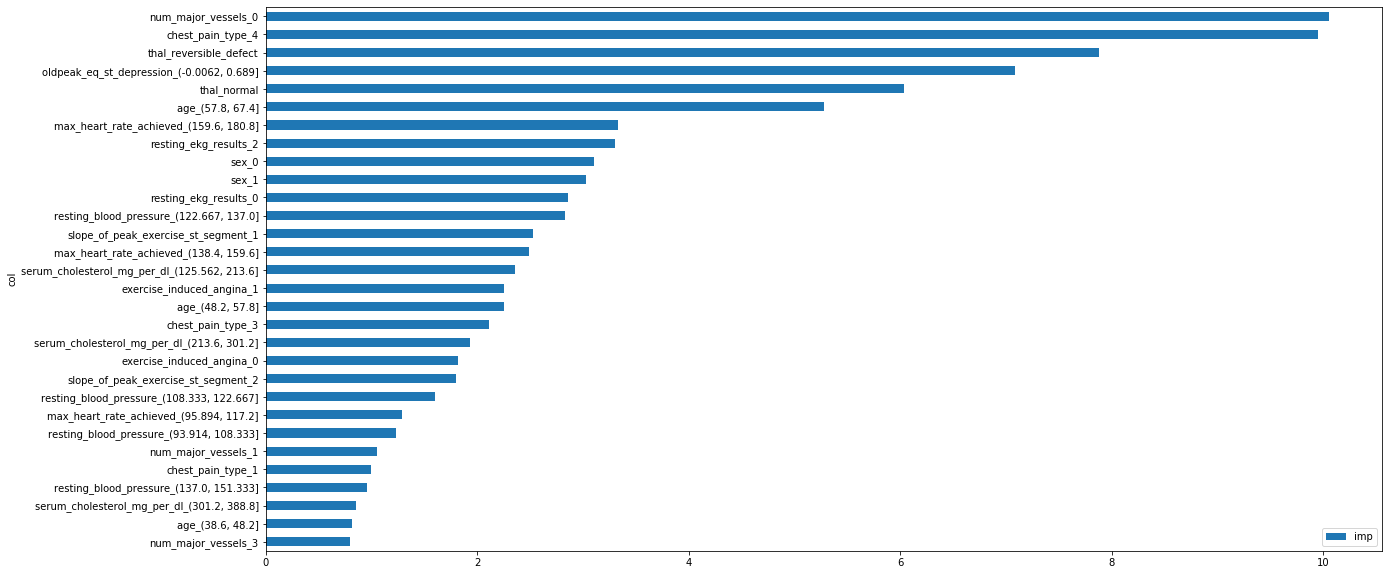

In [83]:
# Plot the feature importance scores
feature_importance(catboost_model, x_train)